In [ ]:
#pip install polars

In [ ]:
import pandas as pd
import polars as pl
import numpy as np
import plotnine as pn
import matplotlib.pyplot as plt

## Final Project
Whats Polars? Whats different and whats the same? Pros and Cons of Polars

Polars is a data frame library like Pandas but designed for high performance data manipulation and analysis in Python. Built with a focus on speed and efficiency, Polars leverages Rust to offer faster computations, which is targeted for large datasets.

---

**Reading from file**

In [ ]:
polarsdf= pl.read_csv("https://raw.githubusercontent.com/roualdes/data/refs/heads/master/donkeys.csv")

pandasdf = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/refs/heads/master/donkeys.csv")

In [ ]:
#Data frame type comparison

print("Polars data frame: ", type(polarsdf))
print()
print("Pandas data frame: ", type(pandasdf))

In [ ]:
#Data frame var type

print("Polars data types: ", polarsdf.dtypes)
print()
print("Pandas data types: ", pandasdf.dtypes)

*Reading data from a file is identical in both Polars and Pandas. However, there are notable differences in how they handle data types. Polars and Pandas store DataFrames in distinct internal structures, reflecting their unique designs. Additionally, Polars tends to use strings for certain columns, whereas Pandas represents them as objects. These distinctions can impact future processing and should be considered when choosing between the two libraries.*

---

**Data manipulation**

1. Filtering data

In [ ]:
#Filter for donkeys that are more then 100kg

print("Pandas: ")
print()
pandafilter = pandasdf[pandasdf["Weight"]>200]
pandasort = pandafilter.sort_values(by= "Weight", ascending =  True)
print(pandasort)

print()

print("Polars: ")
print()
polarsfilter = polarsdf.filter(polarsdf["Weight"]>200)
polarssort = polarsfilter.sort(by = "Weight", descending =  False)
print(polarssort)


*Specify and use of the .filter function in order to filter in polars compared to pandas. Sorting works the opposite way of pandas, instead of sorting with ascending you sort with descending.*

2. Selecting data

In [ ]:
#Select the age for donkeys that weigh more then 200 kg
print("Pandas: ")
print()
result1 = pandafilter["Age"]
print(result1)

print()

print("Polars: ")
print()
result = polarsfilter.select(
    pl.col("Age")
)
print(result)


*In polars you need to use a library function .select in order to view specific columns in a data frame.*

3. Grouping and Aggregating 

In [ ]:
#Find the mean length, median height, and standard deviation weight for each sex of a donkey
print("Pandas: ")
print()
pandagrp=pandasdf.groupby("Sex").aggregate(mean_length = ("Length", np.mean),
                               median_height = ("Height", np.median),
                               std_weight = ("Weight", np.std))
print(pandagrp)

print()

print("Polars: ")
print()
polarsgrp = polarsdf.group_by("Sex").agg([
    pl.col("Length").mean().alias("mean_length"),
    pl.col("Height").median().alias("median_height"),
    pl.col("Weight").std().alias("std_weight")])
print(polarsgrp)

*In order to add to an existing data frame you use .agg instead of .aggregate. In order to create new columns you need to also use the .alias function. Not able to use numpy math functions as polars does not output numpy array but instead series*

4. Editing variable

In [ ]:
print("Panda: ")
pandasedited=pandasdf["Sex"].str.replace("female", "f")
print(pandasedited)

print()

print("Polars: ")
polarsedited=polarsdf.with_columns(pl.col("Sex").str.replace("female", "f"))
print(polarsedited)


*Editing variable names in polars requires the use of the .col polars function to access specific columns*

---

**Library Compatibility**

**Numpy**

In [ ]:
#Error
#Polars
#np.mean(polarsdf["Length"])

In [ ]:
#Panda
print("Pandas: ")
print(np.mean(pandasdf["Length"]))

print()

#Polars
print("Polars: ")
print(np.mean(polarsdf["Length"].to_numpy()))
print(polarsdf["Length"].mean())

In [ ]:
#Polars
result1 = polarsdf["Age"].unique()
print("Polars unique age:",result1)

print()

#Pandas
result2 = pandasdf["Age"].unique()
print("Pandas unique age:",result2)


*The difference here is that pandas outputs the result onto a numpy array while polars outputs a series which is consistent with its data frame structure.*

**Regex**

In [ ]:
#Pandas
print("Pandas: ")
loanpanda = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/refs/heads/master/loans.csv")
print(loanpanda["zip_code"].str.extract("([1-9]{3})"))

print()

#Polars
print("Polars: ")
loanpolar = pl.read_csv("https://raw.githubusercontent.com/roualdes/data/refs/heads/master/loans.csv")
print(loanpolar["zip_code"].str.extract("([1-9]{3})"))

*Regex works exactly the same*

**Plotnine**

In [ ]:
#Pandas
pn.ggplot() + pn.geom_point(loanpanda, pn.aes("loan_amnt", "total_pymnt"))

In [ ]:
#Error
#Polars
#pn.ggplot() + pn.geom_point(loanpolar, pn.aes("loan_amnt", "total_pymnt"))

*Plotnine does not work with polars. This is due to pandas only working with pandas data frames.*

*Graphing for polars works with Altair, hvPlot, Matplotlib, Seabor, and plotty*

---

**Why use Polars?**

**Answer = Speed Up**

Timing reading a file

https://www.kaggle.com/datasets/weitat/sample-sales?resource=download

In [ ]:
%%time
polarsdf1= pl.read_csv("./data/sales_5000000.csv")


In [ ]:
%%timeit
polarsdf1= pl.read_csv("./data/sales_5000000.csv")

In [ ]:
%%time
pandasdf1 = pd.read_csv("./data/sales_5000000.csv")

In [ ]:
%%timeit
pandasdf1 = pd.read_csv("./data/sales_5000000.csv")

Timing filtering 

In [ ]:
polarsSales= pl.read_csv("./data/sales_5000000.csv")
pandasSales = pd.read_csv("./data/sales_5000000.csv")

In [ ]:
polarsSales

In [ ]:
%%time
#Polars
result = polarsSales["Country"].unique()
print("Polars unique country:",result)


In [ ]:
%%time
#Pandas
result = pandasSales["Country"].unique()
print("Polars unique country:",result)

In [ ]:
#%%timeit

# Group by Region and aggregate
result = pandasSales.groupby("Region").agg(
    median_unitssold=("Units Sold", np.median),
    median_unitprice=("Unit Price", np.median),
    total_revenue=("Total Revenue", np.sum),
    std_profit=("Total Profit", np.std),
    total_units_sold=("Units Sold", np.sum),  # For filtering
).reset_index()

#Filter regions with 10,000 units or more
result = result[result["total_units_sold"] > 10000]
result



In [ ]:
#%%timeit

# Group by Region and aggregate
result = (
    polarsSales.group_by("Region")
    .agg([
        pl.col("Units Sold").median().alias("median_unitssold"),
        pl.col("Unit Price").median().alias("median_unitprice"),
        pl.col("Total Revenue").sum().alias("total_revenue"),
        pl.col("Total Profit").std().alias("std_profit"),
        pl.col("Units Sold").sum().alias("total_units_sold"),
    ])
    #Filter regions with 10,000 units or more
    .filter(pl.col("total_units_sold") > 10000)
)
result


Diagram of how it works


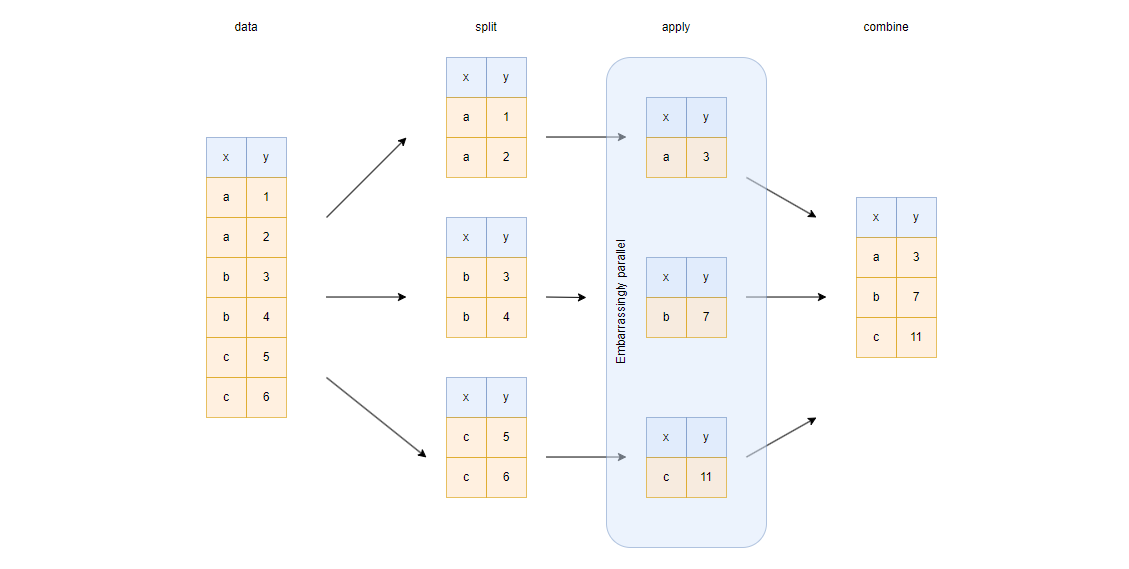